In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras

2022-08-17 12:42:51.652666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-17 12:42:51.652716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_sample(X, y, index):
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1)

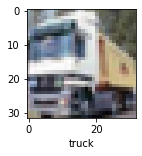

In [7]:
plot_sample(X_train, y_train, 1)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
#let's one hot encode the y_train classes so that we can convert it into a array like for airplane = [1,0,0,0,0,0,0,0,0,0]

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(4000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='SGD',
loss='categorical_crossentropy',
metrics=['accuracy'])

2022-08-17 12:42:59.047607: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-17 12:42:59.047711: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (A613): /proc/driver/nvidia/version does not exist
2022-08-17 12:42:59.059262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.fit(X_train, y_train_categorical,  epochs=5)

2022-08-17 12:43:00.326976: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.8074 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 189s 121ms/step - loss: 1.6089 - accuracy: 0.4310
Epoch 3/5
1563/1563 [==============================] - 174s 111ms/step - loss: 1.5233 - accuracy: 0.4606
Epoch 4/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4565 - accuracy: 0.4854
Epoch 5/5
1563/1563 [==============================] - 179s 114ms/step - loss: 1.4035 - accuracy: 0.5028


In [17]:
model.save('savedModels')

INFO:tensorflow:Assets written to: savedModels/assets
